## Description

#### The dataset consists of data collected from heavy Scania trucks in everyday usage. The system in focus is the Air Pressure system (APS) which generates pressurized air that is utilized in various functions in a truck, such as breaking and gear changes.
#### The datasets' positive class consists of component failures for a specific component of the APS system. The negative class consists of trucks with failures for components not related to the APS. 
#### The training set contains 60000 examples in total in which 59000 belong to the negative class and 1000 positive class. The test set contains 16000 examples. There are 171 attributes per record.


## Objective
#### The main purpose of this project is to classify the failures of the Scania trucks is whether by the components related to APS (Air pressure system) or by the other components that are not related to APS. The data has only 2 classes i.e. positive or negative. So, this is a binary classification problem.



### >> importing necessary library

In [1]:
#Import required libraries
import numpy as np 
import pandas as pd
import scipy.stats as s #statstic
from imblearn.over_sampling import SMOTE #Synthetic Minority Oversampling Technique (#Imbalanced data preprocessing)
from sklearn.model_selection import train_test_split #splitting the dataset
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt # visulization

In [2]:
import warnings
warnings.filterwarnings('ignore')


### >>read the dataset

In [3]:
df_train=pd.read_csv("aps_failure_training_set.csv",header='infer',skiprows=20)
df_test=pd.read_csv("aps_failure_test_set.csv",header='infer',skiprows=20)

In [4]:
df_train.shape

(60000, 171)

In [5]:
df_test.shape

(16000, 171)

In [6]:
df_train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [7]:
df_test.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


### >>lets concatenate the train and test data

In [8]:
data=pd.concat([df_train,df_test])
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


### >> replacing  the class labels with numbers for later analysis. 1: positive, 0: negative.

In [9]:
data['class'].replace( {'neg': 0, 'pos': 1}, inplace=True) # replace 'neg' with 0 and 'pos' with 1 in 'Class column'
data = data.replace(['na'],[np.NaN])

In [10]:
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


### >> visualization of class count

Text(0, 0.5, 'Frequency')

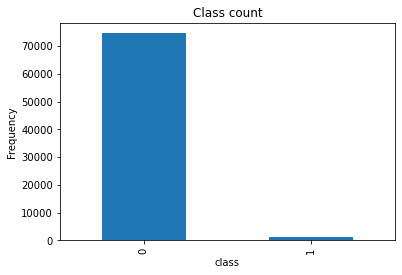

In [11]:
import matplotlib.pyplot as plt
Count = pd.value_counts(data['class'], sort = True).sort_index()
Count.plot(kind = 'bar')
plt.title("Class count")
plt.xlabel("class")
plt.ylabel("Frequency")


#### This is highly imbalanced data set.so ..we  will have to do some sampling tecnique before data modeling. 

### >> Visualization of null value percentage in each variable features

Text(0.5, 1.0, 'Null ratio')

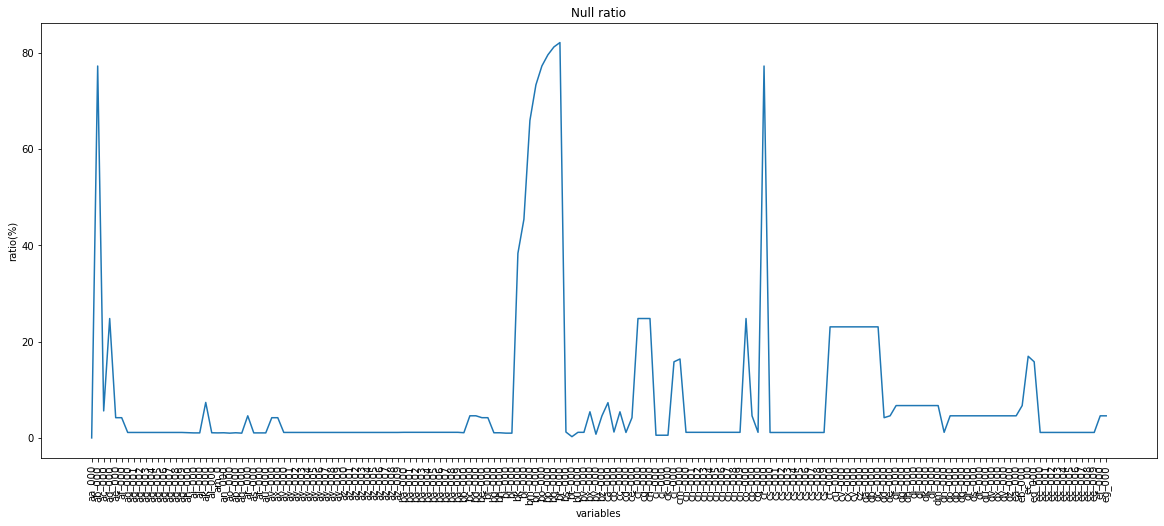

In [12]:
col = data.iloc[:,1:].columns
null_ratio = data.iloc[:,1:].isnull().sum().values / data.shape[0]*100

# null value Check by visualization
plt.figure(figsize=(20,8))
plt.plot(col, null_ratio)
plt.xlabel("variables")
plt.ylabel("ratio(%)")
plt.xticks(rotation=90, fontsize=10)
plt.title("Null ratio")

#### by visualization we can see  some variables have very high null value percentage.so.. we have to drop some variables with high null value percantage.

In [13]:
null_df = pd.DataFrame({"variables":data.iloc[:,1:].columns,
                        "null_ratio":null_ratio})
null_over15_col = null_df[null_df["null_ratio"]>15]["variables"]


In [14]:
null_ratio_df = pd.DataFrame({"null_ratio":data[null_over15_col].isnull().sum()/len(data)*100}).sort_values(by="null_ratio", ascending=False)


In [15]:
drop_col = null_over15_col.values #variables to drop

In [16]:
data_new = data.drop(drop_col, axis=1)

In [17]:
data_new

,class,aa_000,ac_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,2130706438,0,0,0,0,0,0,37250,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,0,0,0,0,0,0,0,18254,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,228,0,0,0,0,0,0,1648,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,70,0,10,0,0,0,318,2212,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,1368,0,0,0,0,0,0,43752,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,81852,2130706432,0,0,0,0,0,0,5486,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,0,18,52,8,26,0,0,0,0,6444,...,266,44,46,14,2,0,0,0,0,0
15997,0,79636,1670,0,0,0,0,0,0,15062,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,0,110,36,0,0,0,0,0,0,198,...,588,210,180,544,1004,1338,74,0,0,0


### >>In order to search for important features from such a large number of variables, analysis was performed using PCA

In [18]:
from sklearn.preprocessing import StandardScaler #standardizes a feature 
from sklearn.decomposition import PCA

df_X = data_new.loc[:,data_new.columns != 'class']
df_Y = data_new.loc[:,data_new.columns == 'class']

df_X = df_X.apply(pd.to_numeric)

df_X= df_X.fillna(df_X.mean()).dropna(axis =1 , how ='all') #imputing the missing values with mean of the respective columns.
scaler = StandardScaler()

scaler.fit(df_X)

df_X = scaler.transform(df_X)

pca = PCA(0.95)#We have lot of correlated variables. So we apply feature engineering method Prinicpal Component Analysis(PCA).

pca.fit(df_X)

pca.n_components_


70

#### We have reduced number of columns from 143 to 70 .

In [19]:
df_X = pca.transform(df_X)

df_X= pd.DataFrame(df_X)


### >> Since the data is unbalanced, working on this will lead to reduction in accuracy and the models will get biased towards majority class. So, to balance the dataset we are using Synthetic minority oversampling technique (SMOTE)

In [20]:
oversample = SMOTE()

X, Y = oversample.fit_resample(df_X,df_Y)

### >>Splitting the dataset into train and test data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_X,df_Y, test_size = 0.70, random_state=42)


## >> Classification prediction model

### classification using Naive Bayes 

In [22]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()

In [23]:
model.fit(X_train,y_train)

GaussianNB()

In [24]:
y_pred = model.predict(X_test)

In [25]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     50978
           1       0.80      0.35      0.48      2222

    accuracy                           0.97     53200
   macro avg       0.88      0.67      0.73     53200
weighted avg       0.96      0.97      0.96     53200



### classification using Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [27]:
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred = model.predict(X_test) #Predict the response for test dataset

In [29]:
Y_pred = y_pred.reshape(-1)

In [30]:
print(classification_report(Y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     52454
           1       0.60      0.78      0.68       746

    accuracy                           0.99     53200
   macro avg       0.80      0.89      0.84     53200
weighted avg       0.99      0.99      0.99     53200



### classification using svm

In [31]:
from sklearn.svm import SVC
model =SVC()

In [32]:
model.fit(X_train,y_train)

SVC()

In [33]:
y_pred = model.predict(X_test)

In [34]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     52874
           1       0.29      0.86      0.43       326

    accuracy                           0.99     53200
   macro avg       0.64      0.92      0.71     53200
weighted avg       0.99      0.99      0.99     53200

